In [7]:
import numpy as np
import matplotlib.pyplot as plt
import lime
from skimage.segmentation import mark_boundaries
import h5py
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, Average

/Users/cgroschner/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

/Users/cgroschner/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/cgroschner/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Looking at Garbage Net V7 with its original inputs

In [4]:
testX = h5py.File('20200514_garbage_detector_data.h5','r')['testX'][:,:,:,:]
testY = h5py.File('20200514_garbage_detector_data.h5','r')['testY'][:,:]

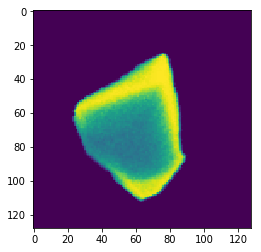

In [72]:
plt.imshow(testX[10,:,:,0])

In [21]:
testX = np.concatenate((testX,testX,testX),axis=3)

In [18]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(64, (3, 3), input_shape=(128, 128,3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(128, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(128, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(128, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(128))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
modelE.load_weights('savio_nets/garbage_net_weights_v7_forlime.h5')

In [22]:
preds = modelE.predict(testX)

In [23]:
explainer = lime_image.LimeImageExplainer()

In [59]:
explanation = explainer.explain_instance(testX[0].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


100% |########################################################################|


In [60]:
explanation.top_labels

[1]

In [61]:
# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage

In [62]:
preds[0]

array([0.01052295, 0.98947704], dtype=float32)

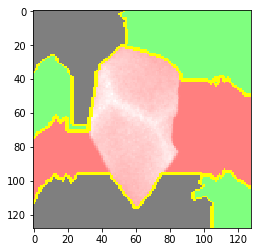

In [63]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

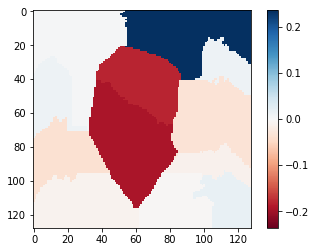

In [64]:

#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


[0]
[9.9927419e-01 7.2587165e-04]


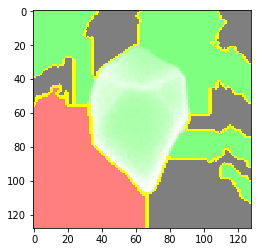

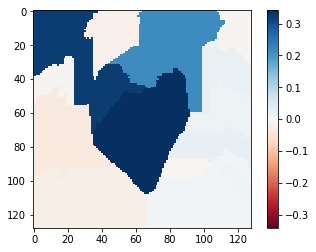

In [67]:
idx = 3
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print(explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage

print(preds[idx])

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

[1]
[0.00976572 0.99023426]


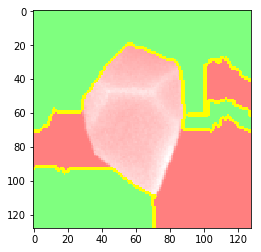

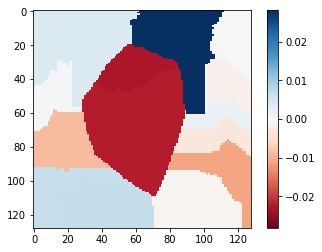

In [70]:
idx = 4
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=5000)


print(explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage

print(preds[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=100, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


[0]
[0.67664635 0.3233537 ]


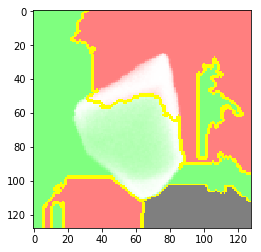

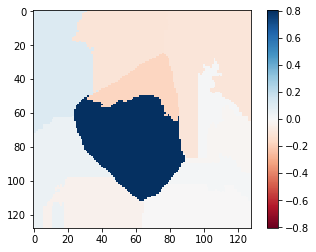

In [73]:
idx = 10
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print(explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage

print(preds[idx])

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## Looking at Garbage Net V11 with its original inputs

In [76]:
from sklearn import utils

In [77]:
good = h5py.File('new_orientation_labels/orientation_labels_20201008.h5','r')['good'][:225,:,:]
bad = h5py.File('new_orientation_labels/orientation_labels_20201008.h5','r')['bad'][:,:,:]

for idx,img in enumerate(good):
    good[idx] = (img-img.min())/(img.max()-img.min())
for idx,img in enumerate(bad):
    bad[idx] = (img-img.min())/(img.max()-img.min())    

good_labels = [[0,1] for i in good]
bad_labels = [[1,0] for i in bad]

trainX = np.concatenate((good[:180],bad[:180]),axis=0)
trainY = np.concatenate((good_labels[:180],bad_labels[:180]),axis=0)
trainX, trainY = utils.shuffle(trainX,trainY,random_state=0)
testX = np.concatenate((good[180:203],bad[180:203]))
testY = np.concatenate((good_labels[180:203],bad_labels[180:203]))
testX, testY = utils.shuffle(testX,testY,random_state=0)
valX = np.concatenate((good[203:],bad[203:]))
valY = np.concatenate((good_labels[203:],bad_labels[203:]))

trainX = np.expand_dims(trainX,axis=3)
testX = np.expand_dims(testX,axis=3)
valX = np.expand_dims(valX,axis=3)

In [84]:
testX = np.concatenate((testX,testX,testX),axis=3)

In [79]:
from tensorflow.keras.optimizers import Adam

In [81]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(32, (3, 3), input_shape=(128, 128,3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(32, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

In [82]:
modelE.load_weights('savio_nets/garbage_net_weights_v11_forlime.h5')

In [95]:
preds = modelE.predict(testX)

true label:  [1 0] predicted label:  [1.0000000e+00 3.0138522e-13] explain top label:  0


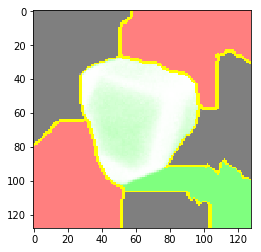

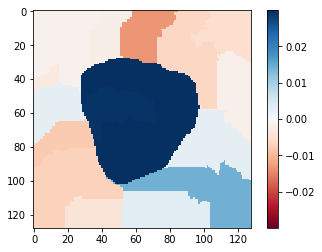

In [96]:
idx = 0
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels[0])

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage



temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


true label:  [0 1] predicted label:  [7.891705e-13 1.000000e+00] explain top label:  [1]


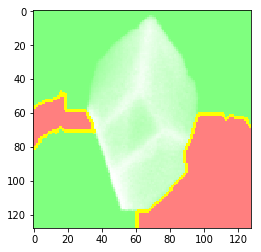

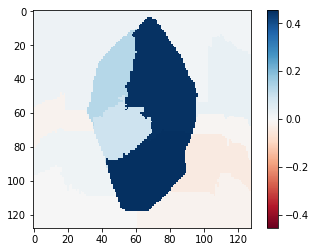

In [97]:
idx = 1
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage



temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=100, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

true label:  [1 0] predicted label:  [1.0000000e+00 3.6883213e-16] explain top label:  [0]


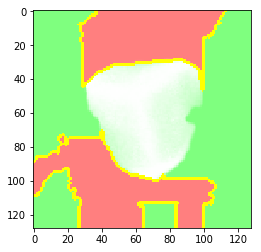

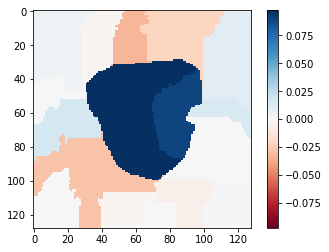

In [98]:
idx = 2
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage



temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


true label:  [0 1] predicted label:  [2.6569573e-09 1.0000000e+00] explain top label:  [1]


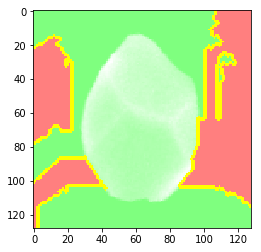

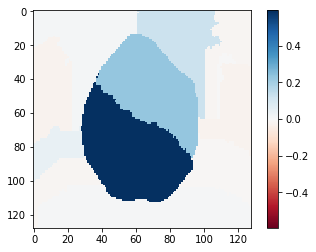

In [99]:
idx = 3
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage



temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


true label:  [0 1] predicted label:  [3.575231e-13 1.000000e+00] explain top label:  [1]


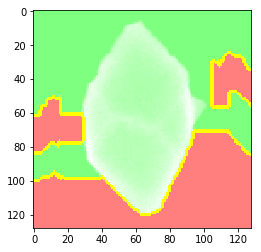

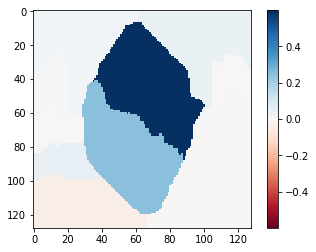

In [100]:
idx = 4
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage



temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


true label:  [1 0] predicted label:  [1.0000000e+00 3.3133478e-09] explain top label:  [0]


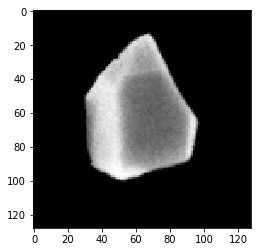

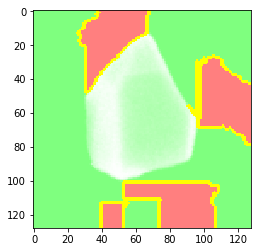

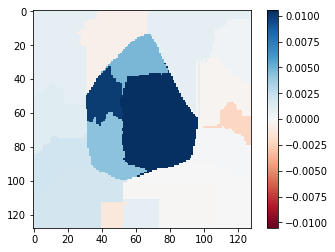

In [103]:
idx = 5
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


true label:  [1 0] predicted label:  [1.0000000e+00 1.8400292e-11] explain top label:  [0]


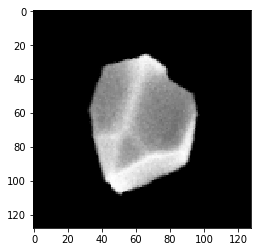

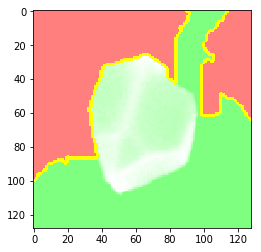

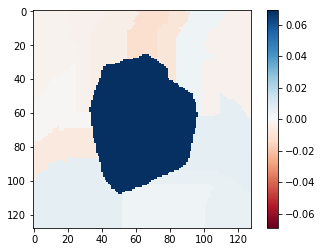

In [104]:
idx = 6
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


true label:  [0 1] predicted label:  [2.7176638e-12 1.0000000e+00] explain top label:  [1]


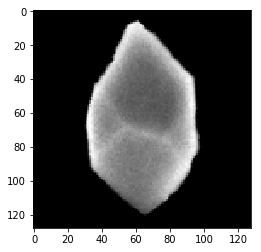

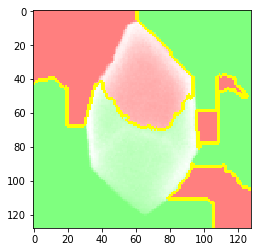

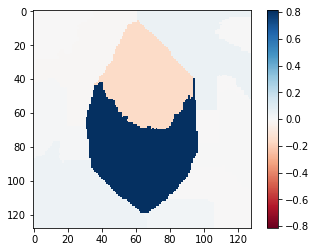

In [105]:
idx = 7
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('true label: ', testY[idx], 'predicted label: ',preds[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## Bring in new data from Ellis

In [107]:
particles = h5py.File('unetnested_segmented_particles.h5','r')['images'][:]

In [108]:
particles.shape

(13383, 128, 128, 1)

In [109]:
particles = np.concatenate((particles,particles,particles),axis=3)

In [114]:
pred_new = modelE.predict(particles[:100])

In [115]:
testX = particles[:100]

100% |########################################################################|


predicted label:  [1.0000000e+00 3.2264506e-08] explain top label:  [0]


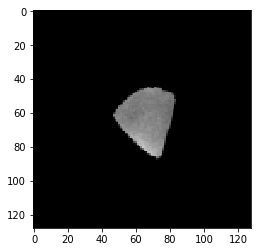

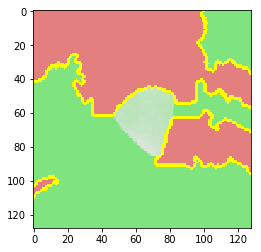

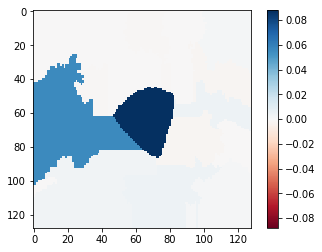

In [126]:
idx = 0
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [9.9981469e-01 1.8535719e-04] explain top label:  [0]


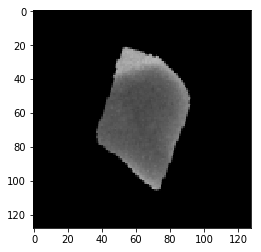

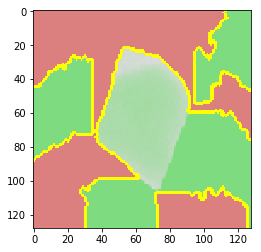

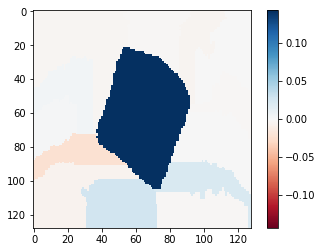

In [127]:
idx = 1
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [9.9999976e-01 2.2566574e-07] explain top label:  [0]


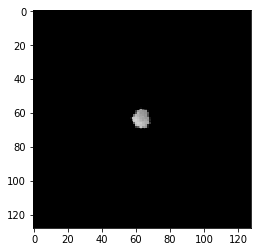

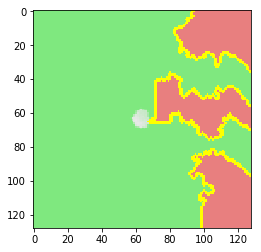

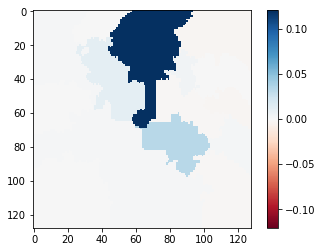

In [128]:
idx = 2
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [0.96277815 0.03722187] explain top label:  [0]


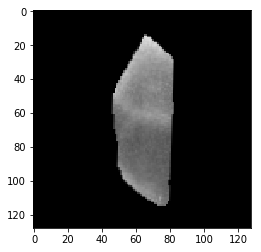

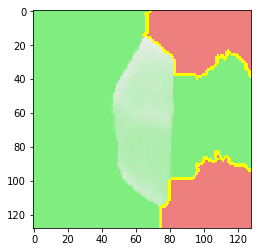

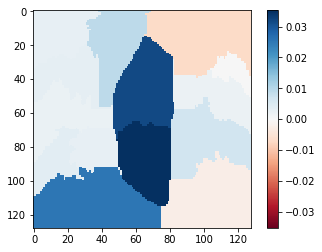

In [129]:
idx = 5
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [4.6506057e-10 1.0000000e+00] explain top label:  [1]


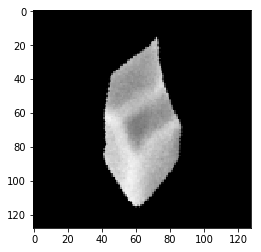

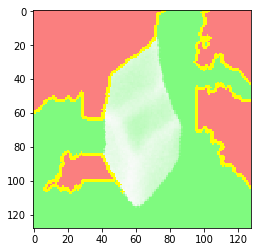

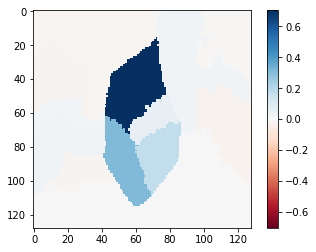

In [137]:
idx = 10
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [8.329644e-04 9.991671e-01] explain top label:  [1]


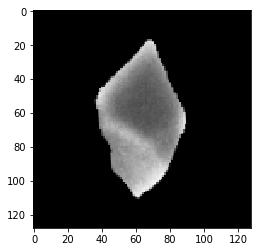

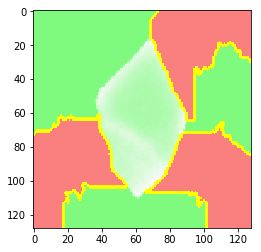

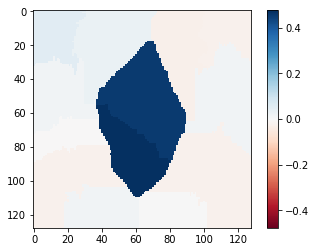

In [139]:
idx = 11
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [0.5074171  0.49258295] explain top label:  [0]


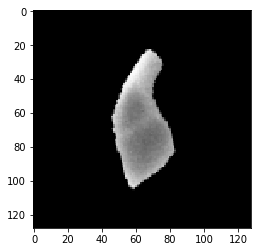

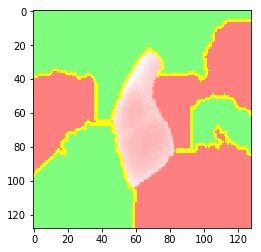

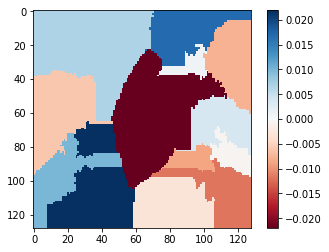

In [145]:
idx = 16
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [0.6761924  0.32380763] explain top label:  [0]


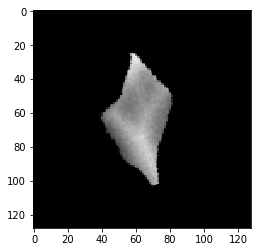

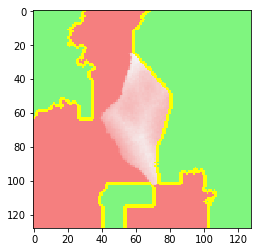

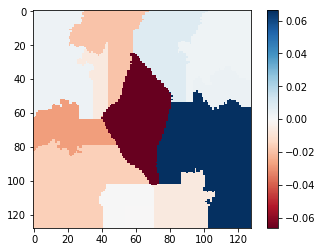

In [148]:
idx = 18
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [9.9999821e-01 1.8322906e-06] explain top label:  [0]


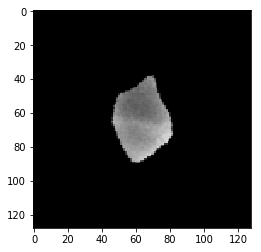

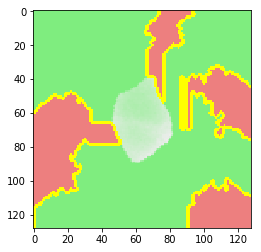

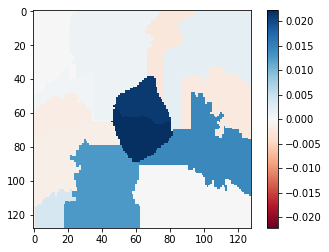

In [157]:
idx = 25
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [7.287131e-09 1.000000e+00] explain top label:  [1]


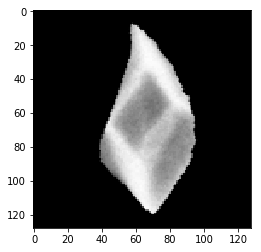

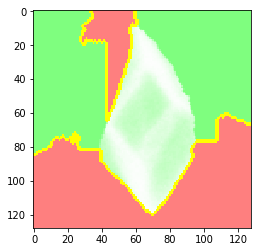

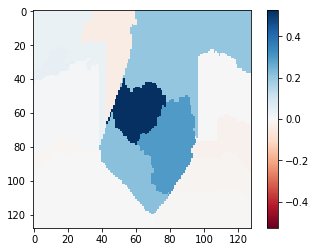

In [164]:
idx = 32
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [0.00888284 0.9911171 ] explain top label:  [1]


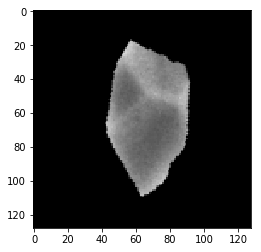

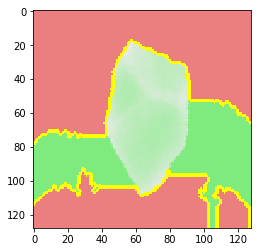

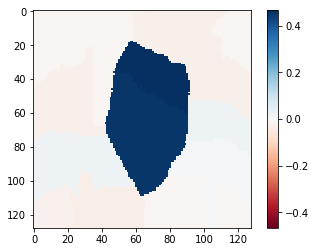

In [166]:
idx = 33
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [9.9997938e-01 2.0601092e-05] explain top label:  [0]


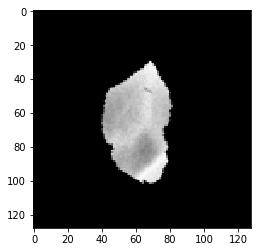

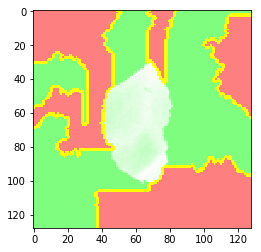

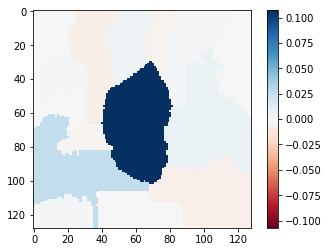

In [173]:
idx = 39
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [9.9977511e-01 2.2489254e-04] explain top label:  [0]


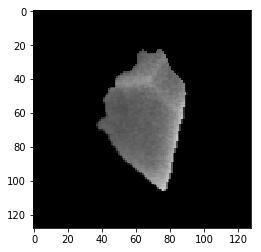

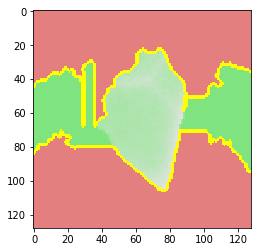

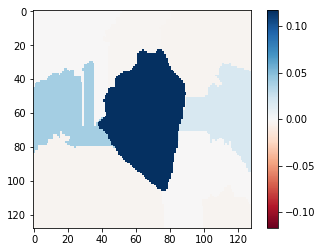

In [183]:
idx = 40
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [2.826995e-09 1.000000e+00] explain top label:  [1]


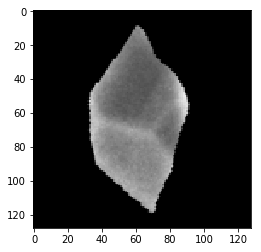

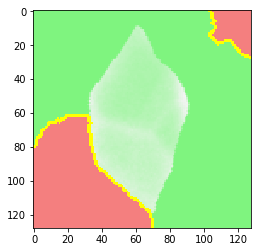

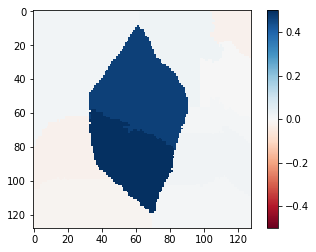

In [191]:
idx = 49
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [0.9693747  0.03062525] explain top label:  [0]


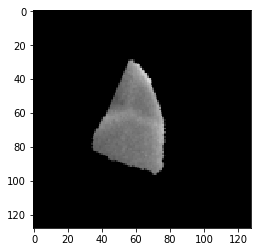

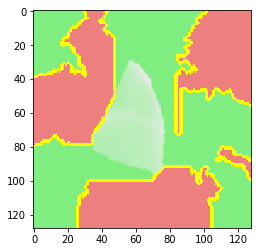

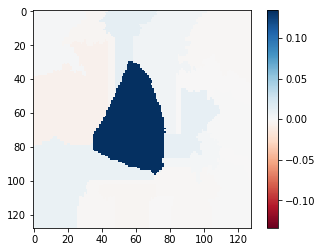

In [192]:
idx = 44
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

Text(0.5,1,'[9.9987066e-01 1.2933956e-04]')

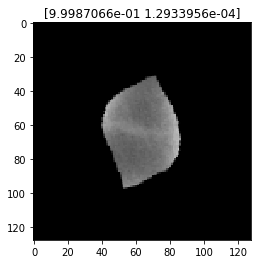

In [194]:
idx = 51
plt.imshow(testX[idx])
plt.title(pred_new[idx])

In [202]:
def filter_orientations(orientations,particles):
    good_particles = []
    good_indices = []
    for idx, o in enumerate(orientations):
        if o.max() > 0.5:
            label = o/o.max()
            label[label<1] = 0
            if label[1] == 1:
                good_particles.append(particles[idx])
                good_indices.append(idx)
    return np.array(good_particles), good_indices

In [203]:
good_particles, good_indices = filter_orientations(pred_new,testX)

In [204]:
good_particles.shape

(8, 128, 128, 3)

In [205]:
good_indices

[10, 11, 32, 33, 49, 55, 88, 93]

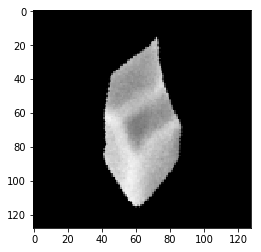

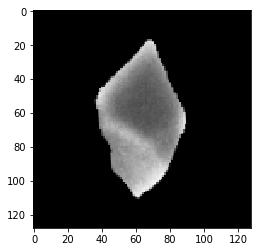

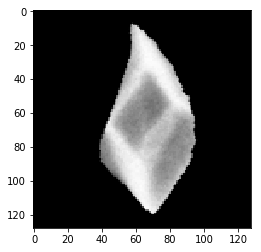

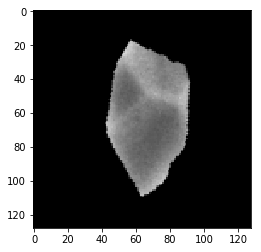

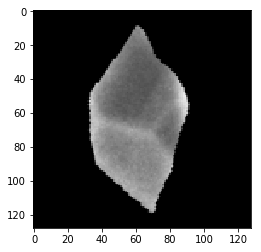

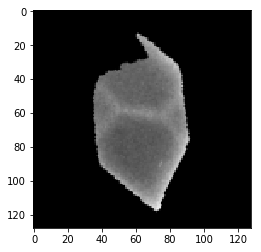

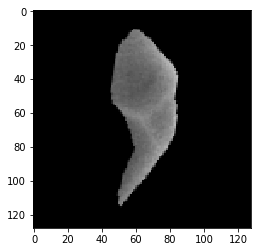

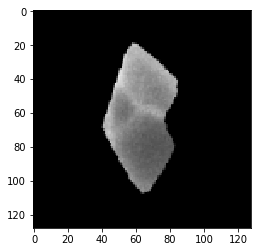

In [211]:
for img in good_particles:
    plt.figure()
    plt.imshow(img)

100% |########################################################################|


predicted label:  [3.4846954e-07 9.9999964e-01] explain top label:  [1]


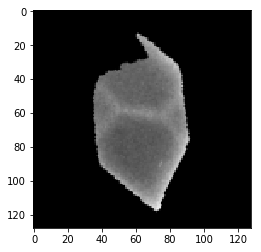

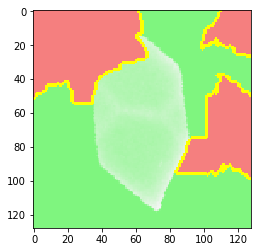

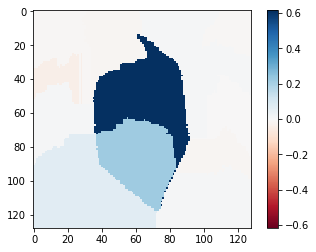

In [206]:
idx = 55
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [0.18703304 0.8129669 ] explain top label:  [1]


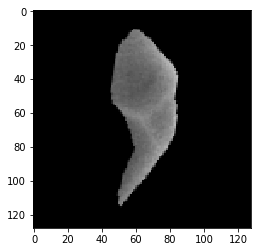

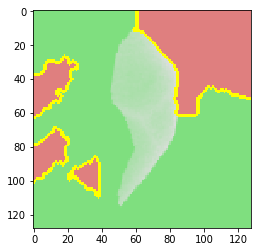

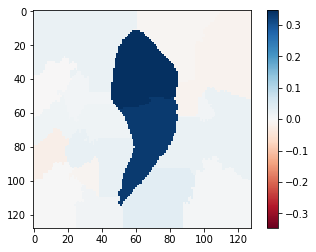

In [207]:
idx = 88
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

100% |########################################################################|


predicted label:  [0.02789018 0.97210985] explain top label:  [1]


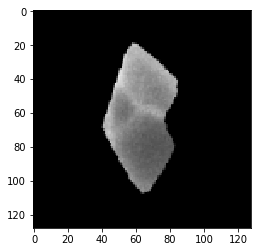

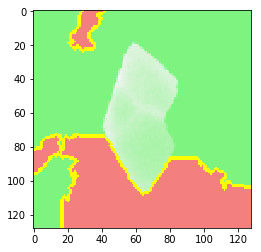

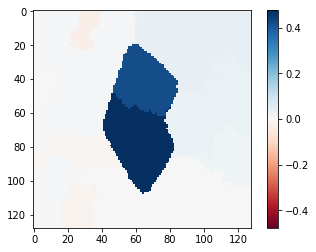

In [208]:
idx = 93
explanation = explainer.explain_instance(testX[idx].astype('double'), modelE.predict, top_labels=1, hide_color=0, num_samples=1000)


print('predicted label: ',pred_new[idx], 'explain top label: ',explanation.top_labels)

# Note to self: when lime says top label is 0 that means its predicting good orientation and when its 1 it thinks its garbage
plt.figure()
plt.imshow(testX[idx])


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=500, hide_rest=False)
plt.figure()
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.figure()
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()